# Best Neighborhood in Pittsburgh

---

## "Best" Metric

### 3 datasets: 
* Arrests 
* Fires
* Population and Desity

Our "best" metric is based on which neighborhood has the least number of arrests per person (arrests/population) and least the number of fires per population density (fires/density) in each of the neighborhoods. We scale arrests by person to compare without a population bias (a bigger area should have more arrests) to level the playing field. The same goes for fires, but we scale by density to get an idea of how packed together the people are meaning the fires are more dangerous. The idea is to see where someone can go with the lowest chance of catching on fire or being the victim of a crime. 

---

## Setup

First let's Import all necessary libraries for data manipulation/representation:

In [119]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Now we'll Read in our shapefile map of Pittsburgh and check out our map

<AxesSubplot:>

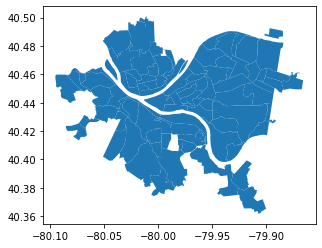

In [120]:
#read in shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#plot map to confirm accuracy
neighborhoods.plot()

Woah cool now we have a map of Pittsburgh!  

Not really that helpful right now, so lets get some more data about it

---

## Getting the data ready

Lets start by reading in our data for fires, arrests, and populations for each neighborhood

In [121]:
#Read in csv file for fire, arrest, pop. density, and population data sets, in that order
fires_messy = pd.read_csv("FireData.csv")
arrests_messy = pd.read_csv("ArrestData.csv")
density_messy = pd.read_csv("Density.csv")
pop_messy = pd.read_csv("Population.csv")

We now have the data files, so lets see what we are looking at  
(This data was taken from [WPRDC](https://data.wprdc.org/dataset) and edited prior to importing into this notebook)

Lets take a look at all the data:

### Arrests

In [122]:
arrests = arrests_messy.iloc[:, 1:]
arrests.head()

,Neighborhood,Number of Arrests
0,Central Business District,2877
1,South Side Flats,2414
2,Carrick,1693
3,East Allegheny,1578
4,Homewood South,1549


### Fire

In [123]:
fires = fires_messy.iloc[:, 1:] # get rid of the extra column on the left
fires.head()

,Neighborhood,Number of Fires
0,Regent Square,5
1,East Carnegie,8
2,Mt. Oliver,10
3,Ridgemont,10
4,St. Clair,11


### Population

In [124]:
pop = pop_messy.iloc[:, 1:]
pop.head()

,Neighborhood,Pop. 2010
0,Squirrel Hill South,15110
1,Shadyside,13915
2,Brookline,13214
3,Squirrel Hill North,11363
4,North Oakland,10551


### Population Density

In [125]:
density = density_messy.iloc[:, 1:]
density.head()

,Neighborhood,Persons / sq. mi (2010)
0,Central Oakland,21658.4
1,North Oakland,21144.3
2,Bluff,20183.5
3,Friendship,16839.6
4,Shadyside,15108.6


So now we have our data all read in and looking clean, and we have our shape file

Now lets combine them so we can visualize the data!

We will have to start with a final touch up of our shape map data to make merging a little bit easier with all of our different data sets

In [126]:
# Remove any rows with missing data
neighborhoods = neighborhoods.dropna()
neighborhoods[['hood','area','perimeter','geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
84,Chartiers City,3683600.5,9983.549,"POLYGON ((-80.06952 40.46044, -80.06944 40.460..."
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."


---

## Displaying the Data

To display the data using Geopandas maps, we first have to merge the shape file with all of our datasets

In [127]:
# merge population data and shape data
pop_map = neighborhoods.merge(pop, how='left', left_on='hood', right_on='Neighborhood')

In [128]:
# merge population data and shape data
density_map = neighborhoods.merge(density, how='left', left_on='hood', right_on='Neighborhood')

In [129]:
# merge population data and shape data
arrest_map = neighborhoods.merge(arrests, how='left', left_on='hood', right_on='Neighborhood')

In [130]:
# merge population data and shape data
fire_map = neighborhoods.merge(fires, how='left', left_on='hood', right_on='Neighborhood')

### Fire Map

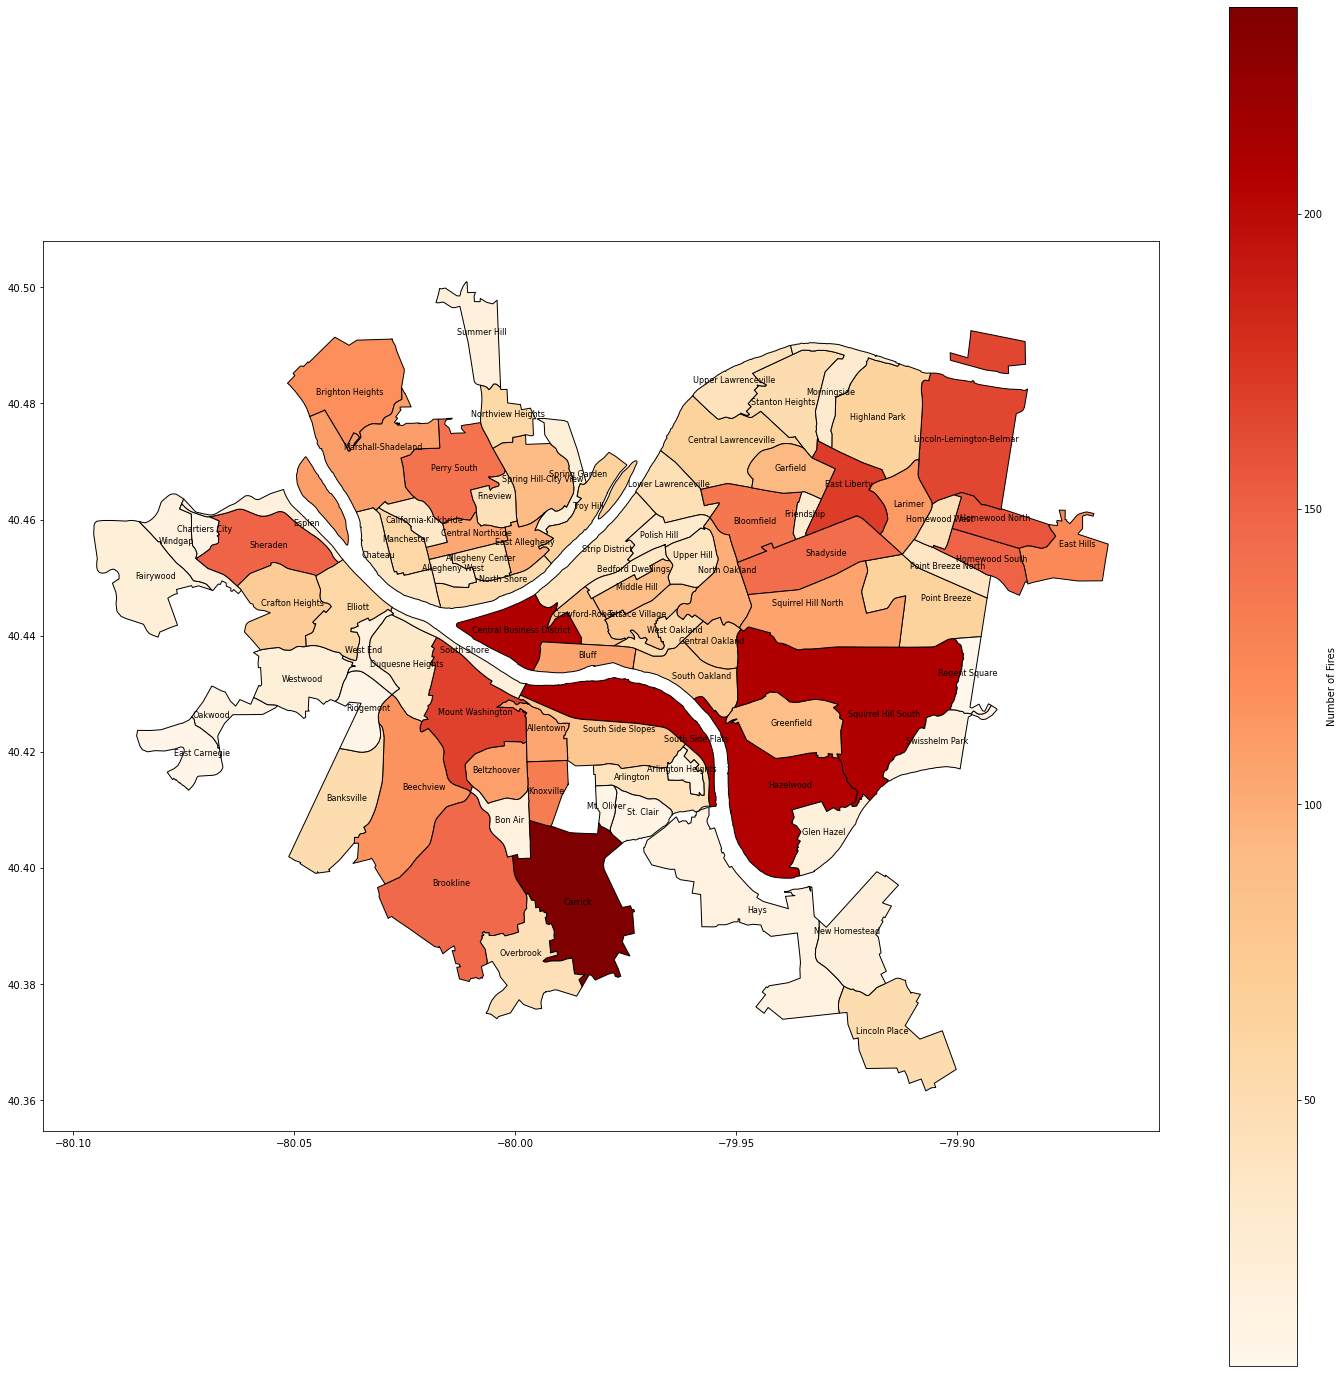

In [131]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
fire_map['coords'] = fire_map['geometry'].apply(lambda x: x.representative_point().coords[:])
fire_map['coords'] = [coords[0] for coords in fire_map['coords']]

# Map setup
fire_map.plot(column='Number of Fires', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Fires"}, # label the legend
               figsize=(25, 25)        # set the size
               # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in fire_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

### Arrest map

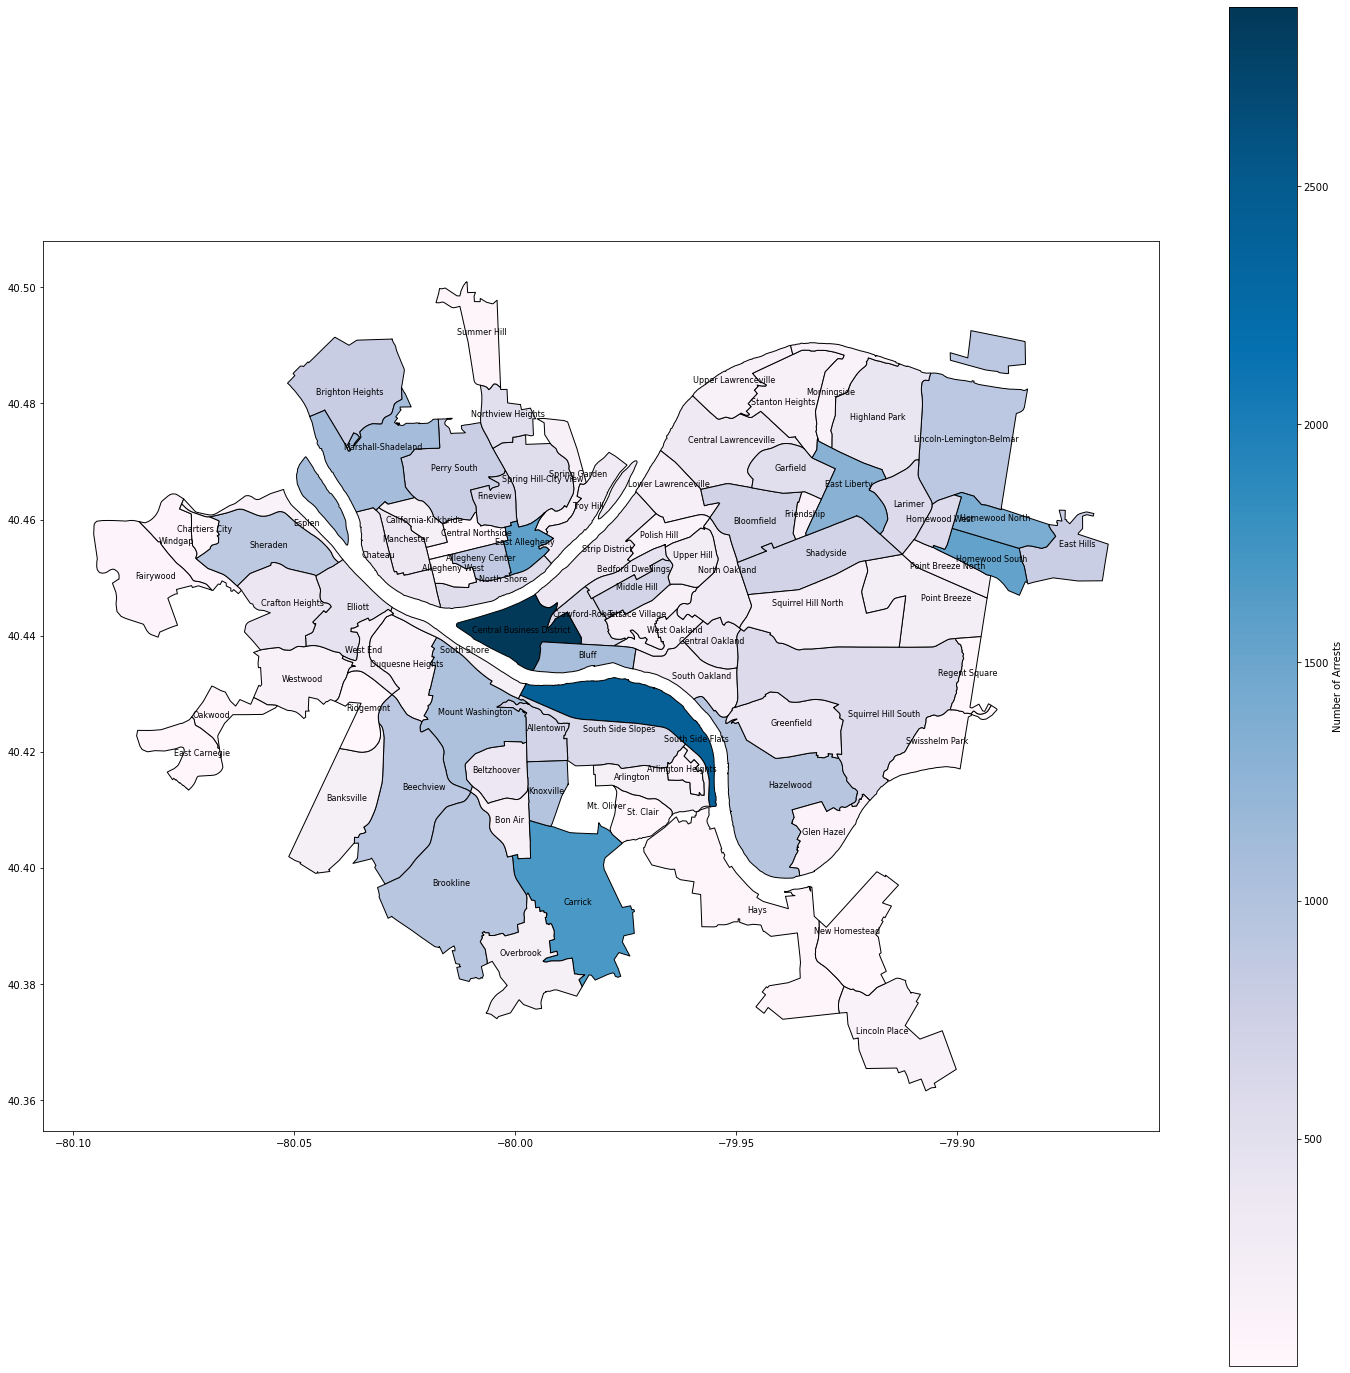

In [132]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
arrest_map['coords'] = arrest_map['geometry'].apply(lambda x: x.representative_point().coords[:])
arrest_map['coords'] = [coords[0] for coords in arrest_map['coords']]

# Map setup
arrest_map.plot(column='Number of Arrests', # set the data to be used for coloring
               cmap='PuBu',              # choose a coluor palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in arrest_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

### Population Map

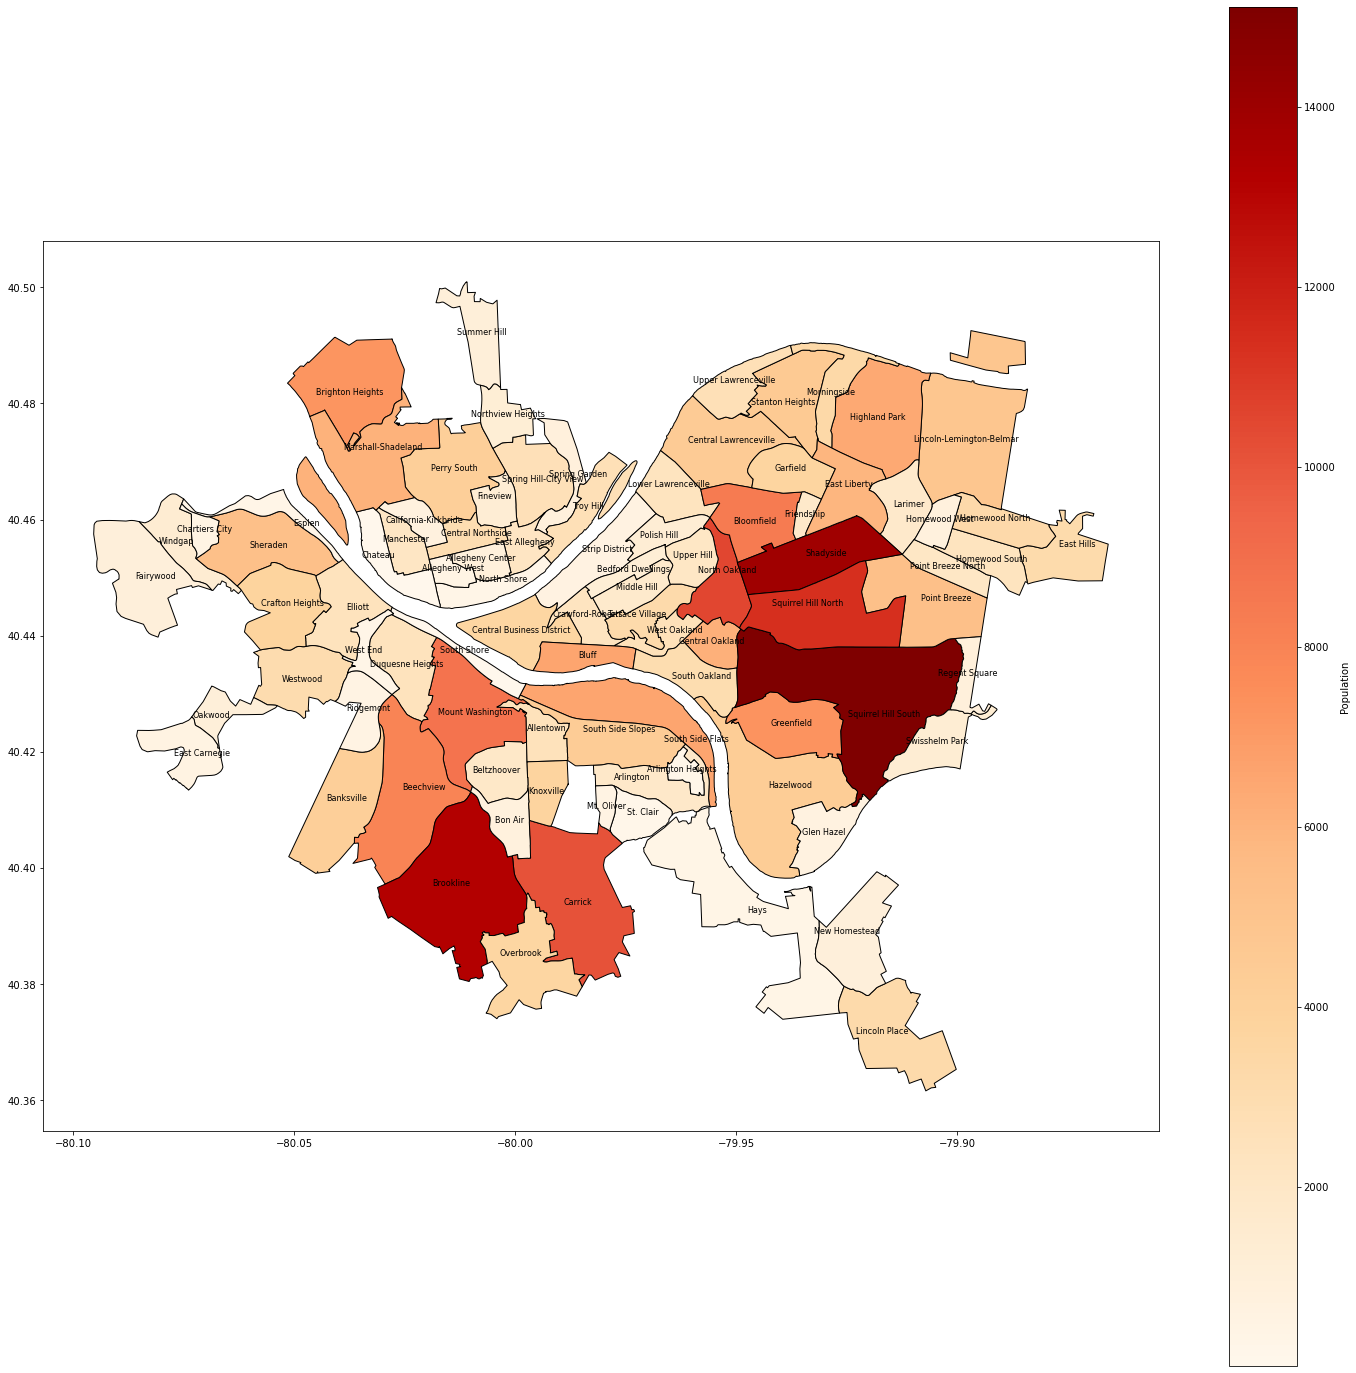

In [133]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
pop_map['coords'] = pop_map['geometry'].apply(lambda x: x.representative_point().coords[:])
pop_map['coords'] = [coords[0] for coords in pop_map['coords']]

# Map setup
pop_map.plot(column='Pop. 2010', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # label the legend
               figsize=(25, 25),        # set the size
               )


# More map labeling code from above source
for i, row in pop_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize='8')



### Population Density

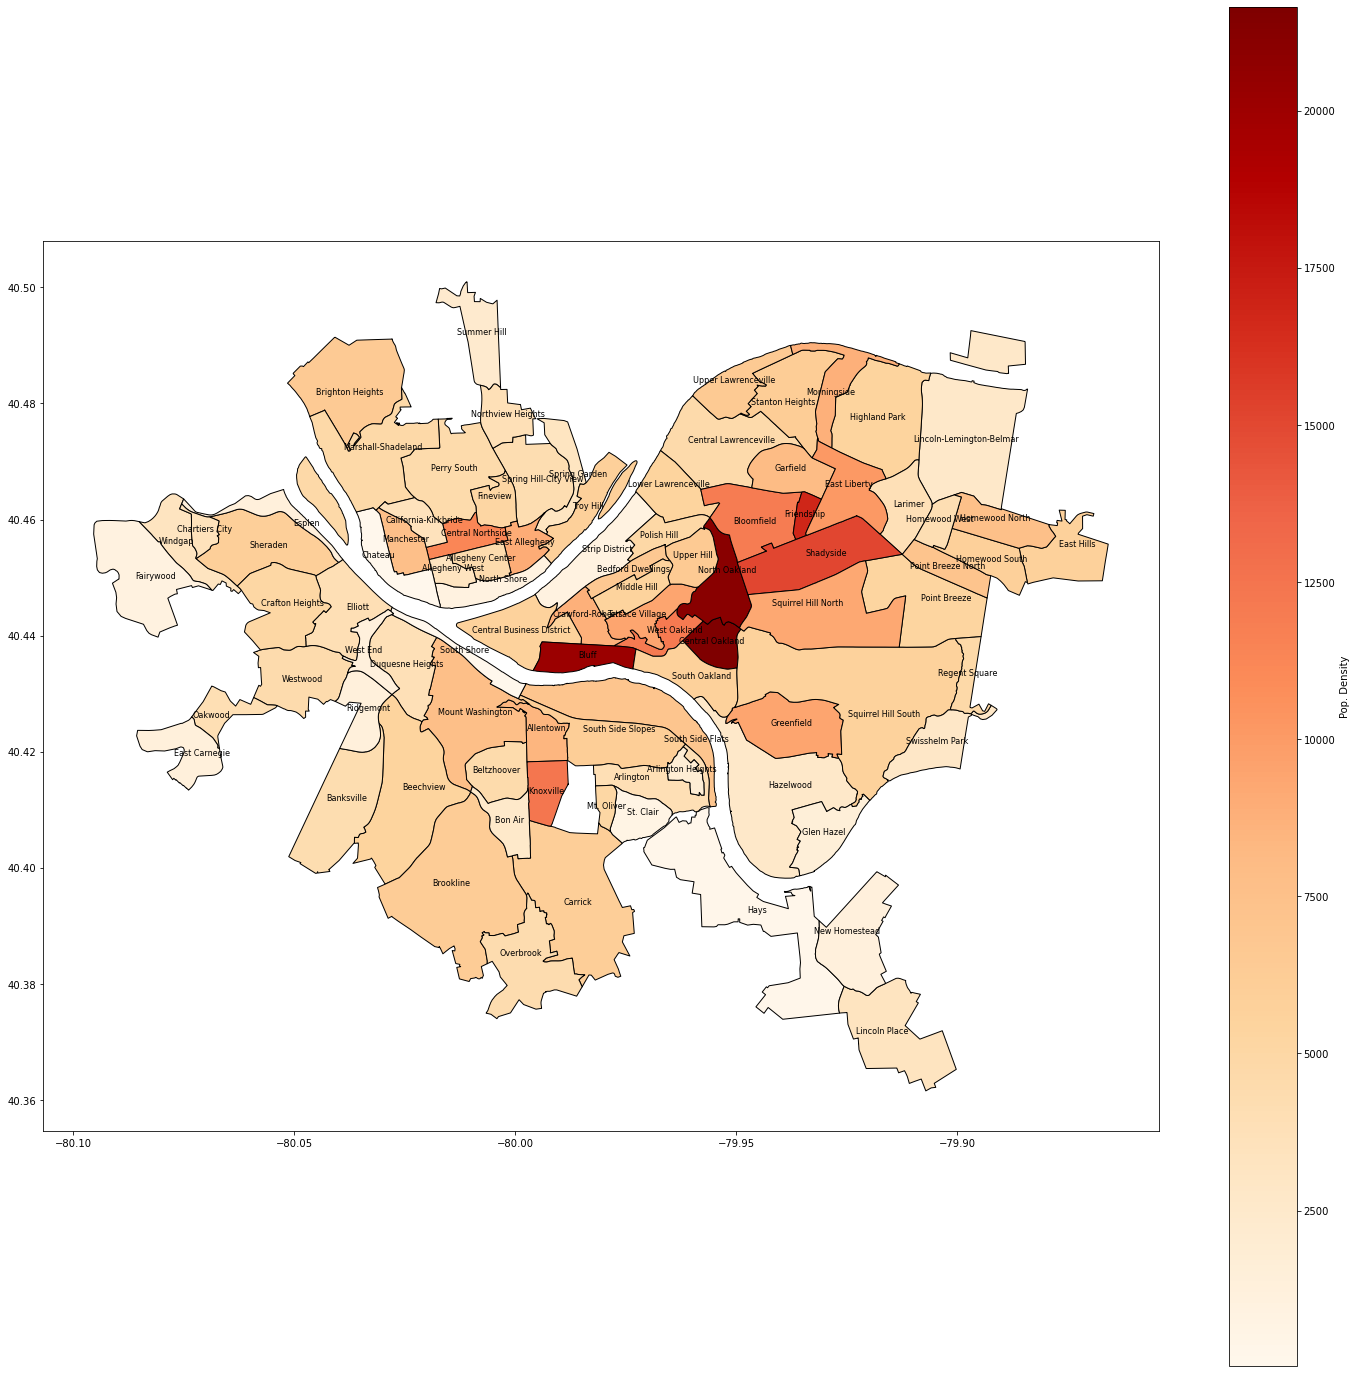

In [134]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
density_map['coords'] = density_map['geometry'].apply(lambda x: x.representative_point().coords[:])
density_map['coords'] = [coords[0] for coords in density_map['coords']]

# Map setup
density_map.plot(column='Persons / sq. mi (2010)', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Pop. Density"}, # label the legend
               figsize=(25, 25)        # set the size
              # missing_kwds={"color": "lightgrey"}, # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in density_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

---

## Incorperating Population

### Arrests

In [135]:
#merge data for population and arrests
pop_arrests = pop.merge(arrests, how = 'left', left_on = 'Neighborhood', right_on = 'Neighborhood')
pop_arrests.head()

,Neighborhood,Pop. 2010,Number of Arrests
0,Squirrel Hill South,15110,587.0
1,Shadyside,13915,713.0
2,Brookline,13214,928.0
3,Squirrel Hill North,11363,198.0
4,North Oakland,10551,311.0


In [136]:
#remove any neighborhoods missing data (whole row)
pop_arrests.dropna()

,Neighborhood,Pop. 2010,Number of Arrests
0,Squirrel Hill South,15110,587.0
1,Shadyside,13915,713.0
2,Brookline,13214,928.0
3,Squirrel Hill North,11363,198.0
4,North Oakland,10551,311.0
...,...,...,...
85,West End,254,198.0
86,Arlington Heights,244,111.0
87,St. Clair,209,36.0
88,South Shore,19,208.0


Now we'll divide the number of arrests by the population to weight it and add that to the dataframe

In [137]:
weighted = []
for i in range(len(pop_arrests.index)):
    arrest = pop_arrests['Number of Arrests'][i]
    pop = pop_arrests['Pop. 2010'][i]
    weighted.append(arrest / pop)
    
pop_arrests.insert(3,"Weighted Arrests", weighted, True)
pop_arrests.head()

,Neighborhood,Pop. 2010,Number of Arrests,Weighted Arrests
0,Squirrel Hill South,15110,587.0,0.038848
1,Shadyside,13915,713.0,0.051240
2,Brookline,13214,928.0,0.070229
3,Squirrel Hill North,11363,198.0,0.017425
4,North Oakland,10551,311.0,0.029476


### Fires

Next we'll prep the fire DataFrame for weighting by population density

In [138]:
# merge data for fires and population density
pop_fires = density.merge(fires, how = 'left', left_on = 'Neighborhood', right_on = 'Neighborhood')
pop_fires.head()

,Neighborhood,Persons / sq. mi (2010),Number of Fires
0,Central Oakland,21658.4,80
1,North Oakland,21144.3,100
2,Bluff,20183.5,105
3,Friendship,16839.6,27
4,Shadyside,15108.6,143


Divide the number of fires by the density for each neighborhood

In [139]:
weighted = []
for i in range(len(pop_arrests.index)):
    f = pop_fires['Number of Fires'][i]
    d = pop_fires['Persons / sq. mi (2010)'][i]
    weighted.append(f / d)
    
pop_fires.insert(3,"Weighted Fires", weighted, True)
pop_fires.head()

,Neighborhood,Persons / sq. mi (2010),Number of Fires,Weighted Fires
0,Central Oakland,21658.4,80,0.003694
1,North Oakland,21144.3,100,0.004729
2,Bluff,20183.5,105,0.005202
3,Friendship,16839.6,27,0.001603
4,Shadyside,15108.6,143,0.009465


---

## Determining "Goodness"

To see how safe/good a neighborhood is, we first have a "badness" rating which is (weighted fires + weighted arrests) and to see how good a neighborhood we subtract this from 1 giving us a sort of complement.

In [140]:
weighted = []
for i in range(len(pop_arrests.index)):
    f = pop_fires['Weighted Fires'][i]
    a = pop_arrests['Weighted Arrests'][i]
    weighted.append(1 - (f + a))
    
pop_fires.insert(4,"Goodness", weighted, False)
pop_fires.head()

,Neighborhood,Persons / sq. mi (2010),Number of Fires,Weighted Fires,Goodness
0,Central Oakland,21658.4,80,0.003694,0.957458
1,North Oakland,21144.3,100,0.004729,0.944031
2,Bluff,20183.5,105,0.005202,0.924569
3,Friendship,16839.6,27,0.001603,0.980972
4,Shadyside,15108.6,143,0.009465,0.961059


Multiply each goodness proportion by 1000 to make the difference more noticable on the map 

In [141]:
weighted = []
for i in range(len(pop_fires.index)):
    percentage = pop_fires['Goodness'][i]
    weighted.append(percentage * 1000)
    
pop_fires.drop(labels = ['Goodness'], axis = 'columns', inplace = True)
pop_fires.insert(4, "Goodness", weighted, False)
pop_fires.head()

,Neighborhood,Persons / sq. mi (2010),Number of Fires,Weighted Fires,Goodness
0,Central Oakland,21658.4,80,0.003694,957.457838
1,North Oakland,21144.3,100,0.004729,944.030924
2,Bluff,20183.5,105,0.005202,924.569185
3,Friendship,16839.6,27,0.001603,980.971661
4,Shadyside,15108.6,143,0.009465,961.059313


In [142]:
goodness = pop_fires.iloc[:, [0,4]] 
goodness.head()

,Neighborhood,Goodness
0,Central Oakland,957.457838
1,North Oakland,944.030924
2,Bluff,924.569185
3,Friendship,980.971661
4,Shadyside,961.059313


Eliminate any absolutely horrible neighborhoods (I'm talking to you Chateau) which yielded negative goodness values

In [143]:
goodness = goodness.dropna()
goodness = goodness.sort_values('Goodness', ascending = False, ignore_index = True)
goodness = goodness.iloc[0:86, :]

---

## "Goodness" Map

In [144]:
# merge population data and shape data
goodness_map = neighborhoods.merge(goodness, how='left', left_on='hood', right_on='Neighborhood')
# verify the data merged correctly
goodness_map[['hood', 'Goodness', 'Neighborhood', 'geometry']].head()

,hood,Goodness,Neighborhood,geometry
0,Central Oakland,957.457838,Central Oakland,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,944.030924,North Oakland,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,878.534189,West Oakland,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,808.415958,Crawford-Roberts,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,487.773352,Strip District,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


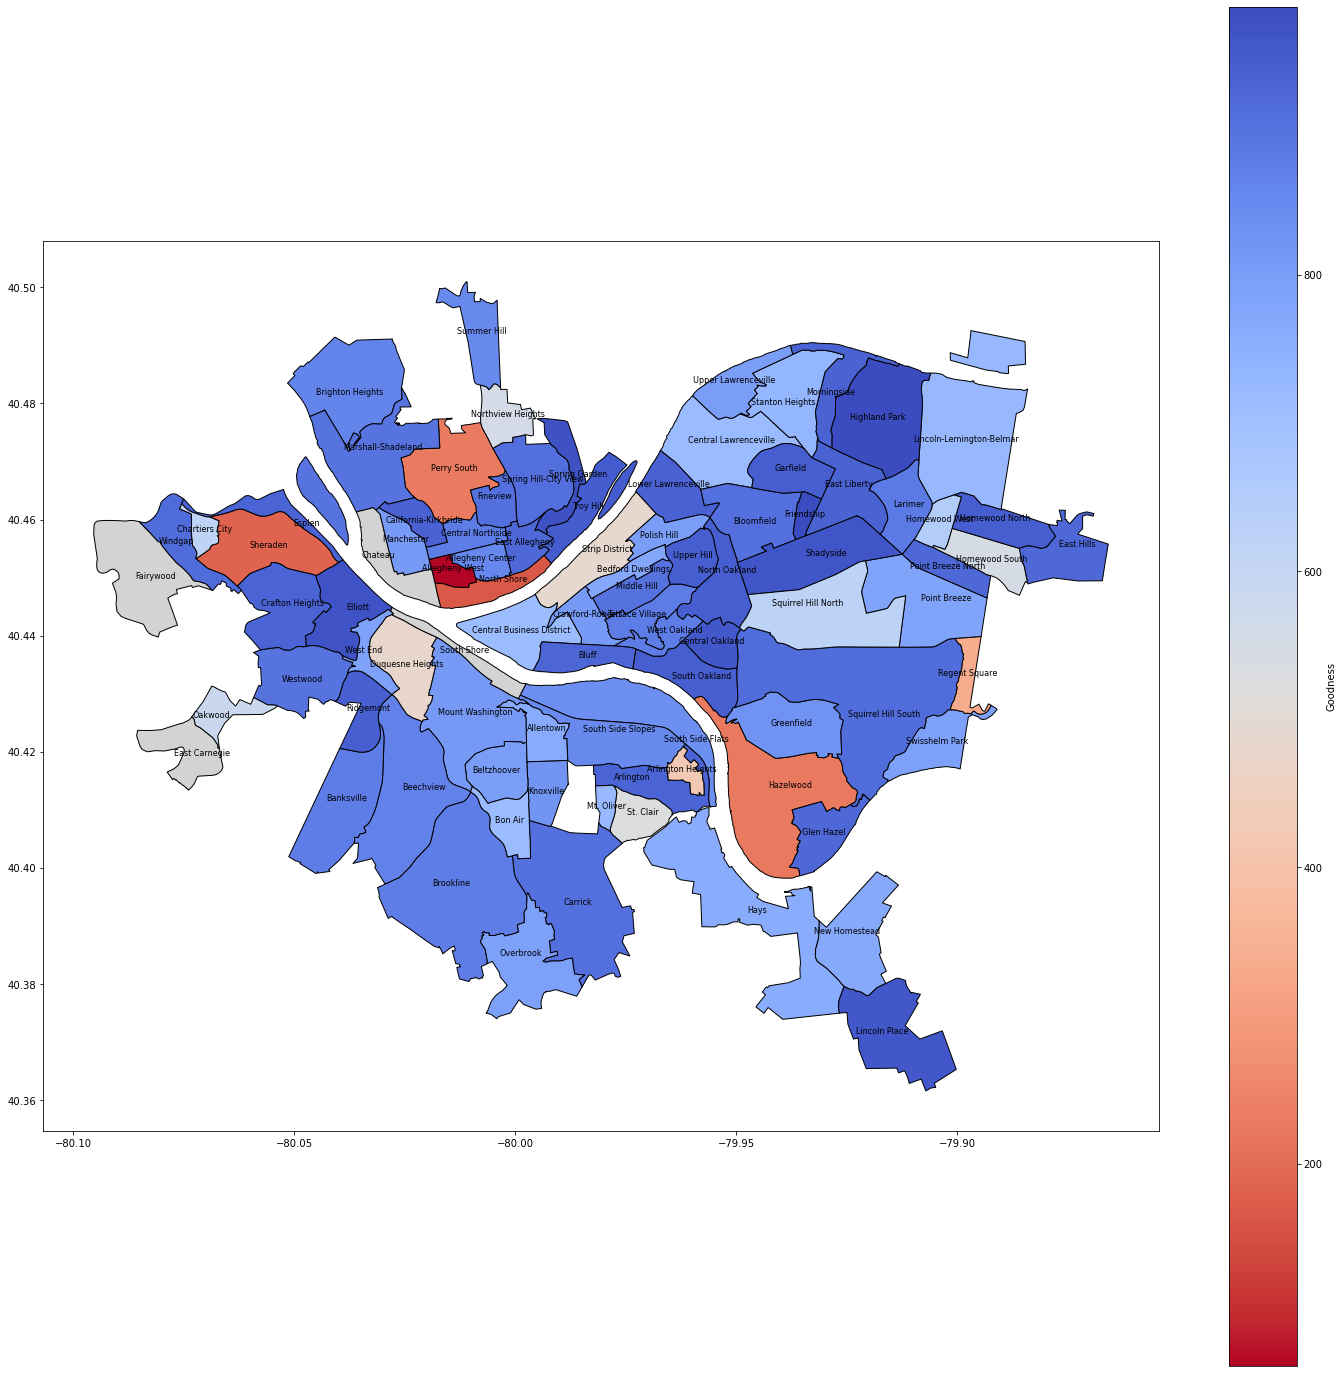

In [145]:
# Code for labeling the map (https://stackoverflow.com/questions/38899190/geopandas-label-polygons)
goodness_map['coords'] = goodness_map['geometry'].apply(lambda x: x.representative_point().coords[:])
goodness_map['coords'] = [coords[0] for coords in goodness_map['coords']]

# Map setup
goodness_map.plot(column='Goodness', # set the data to be used for coloring
               cmap='coolwarm_r',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend=True,              # show the legend
               legend_kwds={'label': "Goodness"}, # label the legend
               figsize=(25, 25),        # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


# More map labeling code from above source
for i, row in arrest_map.iterrows():
    plt.annotate(text=row['hood'], xy=row['coords'],
                 horizontalalignment='center', fontsize = '8')

---

## Conclusions

### The Best Neighborhood: 
* #### Friendship 

### The Worst Neighborhood:
* #### Chateau - seriously it's not even funny this area broke the map with its negative rating

### Final Thoughts


After analyzing arrest data and fire data taking population into account, our group can see with a high level of confidence that the chances of being mugged in a flaming building is very low in the aptly named Friendship and are concerningly high in Chateau. Our key takeaway is that it's not about the numbers that you crunch or even the accuracy of your assertions, but rather the *Friendship*s you make along the way.